In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import pydataset
import sklearn.preprocessing

# Scaling

- why? 
    1. visualization (when the audience are data scientists)
    2. to get a normal distribution, usually stats tests
    3. modeling
- when?
    1. prep / exploration (concerning ds pipeline)
    2. when we have to  (don't scale for the sake of scaling; original units will be more meaningful if they can be related to one another)
    3. log transformation

In [2]:
df = pydataset.data("sat.act")
df

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0
...,...,...,...,...,...,...
39915,1,3,25,30,500,500.0
39937,1,4,40,27,613,630.0
39951,2,3,24,31,700,630.0
39961,1,4,35,32,700,780.0


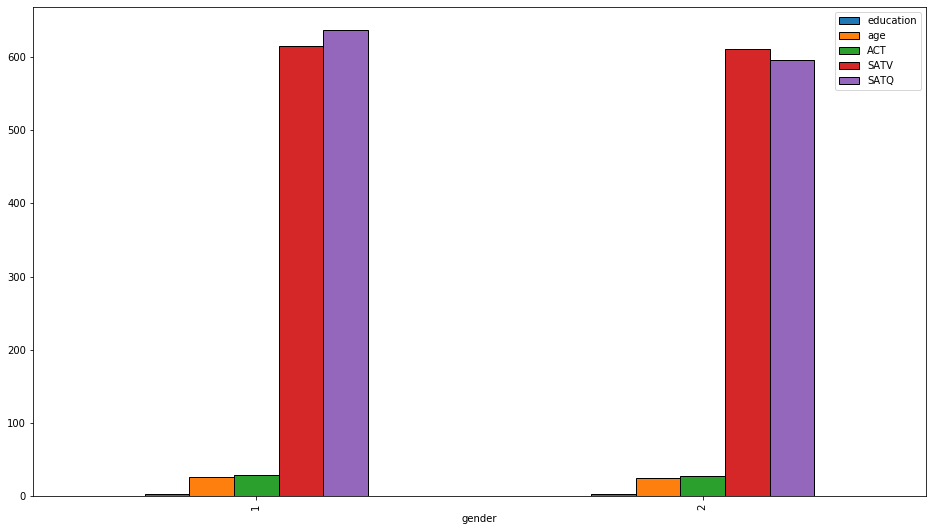

In [3]:
df.groupby("gender").mean().plot.bar(figsize=(16, 9), ec="black")

## Train Test Split

Purpose: Get an idea of how our model performs with unseen data

In [4]:
from sklearn.model_selection import train_test_split

2 Ways to Train Test Split:

1. 2 separate train and test datasets
2. Split our data in to X and Y, and have 4 datasets: X_train, y_train, X_test, y_test


Note:
    - Capital "X" is multidemensional
    - Lower-case "y" is typically a singluar variable we are trying to predict 

In [5]:
mpg = pydataset.data("mpg")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [6]:
# train, test = train_test_split(mpg)
train, test = train_test_split(mpg, train_size=.8, random_state=56) # random_state argument ensures reproducibility 

print("# of rows in train", train.shape[0])
print("% of train:", train.shape[0] / mpg.shape[0])
print("# of rows in test", test.shape[0])
print("% of test:", test.shape[0] / mpg.shape[0])

# of rows in train 187
% of train: 0.7991452991452992
# of rows in test 47
% of test: 0.20085470085470086


In [7]:
train

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
117,hyundai,tiburon,2.0,1999,4,manual(m5),f,19,29,r,subcompact
145,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
64,dodge,durango 4wd,5.9,1999,8,auto(l4),4,11,15,r,suv
...,...,...,...,...,...,...,...,...,...,...,...
163,subaru,forester awd,2.5,2008,4,manual(m5),4,19,25,p,suv
193,toyota,camry solara,3.3,2008,6,auto(s5),f,18,27,r,compact
144,nissan,altima,2.5,2008,4,auto(av),f,23,31,r,midsize
229,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize


>Train test splits are randomized

In [8]:
X = mpg[["cyl", "displ"]]
y = mpg["hwy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

X_train: (175, 2)
X_test: (59, 2)
y_train: (175,)
y_test: (59,)


In [9]:
y_train # is a series

180    29
222    44
225    26
131    15
137    18
       ..
99     20
221    24
67     17
127    12
110    27
Name: hwy, Length: 175, dtype: int64

In [10]:
X_train # is a DataFrame

,cyl,displ
180,4,2.2
222,4,1.9
225,4,2.0
131,8,4.0
137,8,5.4
...,...,...
99,8,5.4
221,6,2.8
67,8,4.7
127,8,4.7


MinMax Scaling

0-1

In [11]:
x = pd.Series([-4, -2, 1, 16])
print(x)

(x - x.min()) / (x.max() - x.min())

0    -4
1    -2
2     1
3    16
dtype: int64


0    0.00
1    0.10
2    0.25
3    1.00
dtype: float64

>When scaling, scaling parameters (e.g. min and max in min-max scaling) should be learned from the training dataset, then applied to the test dataset.

3. Linear Scaling
    - MinMax: everything between 0 and 1

- linear: we anticipate that linear scaling will not change the test statistics
- non-linear: we anticipate that non-linear scaling will change the test statistics

Log is useful for when values are spread out and there are a lot of values close to zero and others that are higher value

Useful when you have data that are ranging different orders of magnitude (e.g. 10s, 100s, 1000s, 10000s)

(array([796.,  69.,  21.,  26.,  21.,  14.,  17.,  13.,  17.,   6.]),
 array([1.00021279e+00, 9.97528265e+03, 1.99495651e+04, 2.99238475e+04,
        3.98981300e+04, 4.98724124e+04, 5.98466948e+04, 6.98209773e+04,
        7.97952597e+04, 8.97695422e+04, 9.97438246e+04]),
 <a list of 10 Patch objects>)

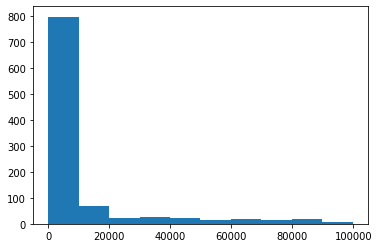

In [12]:
x = 10 ** np.random.uniform(0, 5, 1000)

plt.hist(x)

(array([51., 35., 44., 42., 32., 36., 48., 40., 33., 41., 38., 45., 37.,
        44., 45., 33., 43., 33., 40., 36., 48., 34., 34., 41., 47.]),
 array([2.12768873e-04, 4.60618675e-01, 9.21024581e-01, 1.38143049e+00,
        1.84183639e+00, 2.30224230e+00, 2.76264821e+00, 3.22305411e+00,
        3.68346002e+00, 4.14386592e+00, 4.60427183e+00, 5.06467774e+00,
        5.52508364e+00, 5.98548955e+00, 6.44589546e+00, 6.90630136e+00,
        7.36670727e+00, 7.82711317e+00, 8.28751908e+00, 8.74792499e+00,
        9.20833089e+00, 9.66873680e+00, 1.01291427e+01, 1.05895486e+01,
        1.10499545e+01, 1.15103604e+01]),
 <a list of 25 Patch objects>)

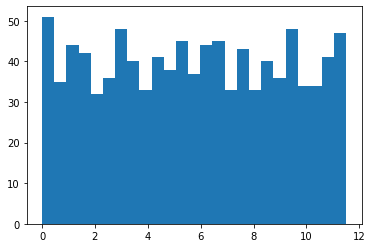

In [13]:
plt.hist(np.log(x), bins=25)

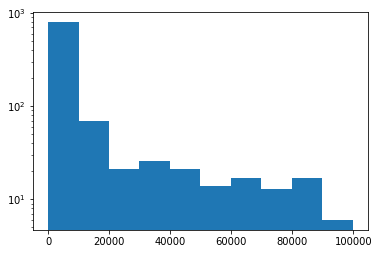

In [14]:
plt.hist(x)
plt.yscale("log")

---
# Sklearn Implementation

#### Process
1. Create object
2. Fit object to dataset
3. Use the object

In [15]:
import sklearn.preprocessing
import pydataset

In [16]:
df = pydataset.data("sat.act")
df

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0
...,...,...,...,...,...,...
39915,1,3,25,30,500,500.0
39937,1,4,40,27,613,630.0
39951,2,3,24,31,700,630.0
39961,1,4,35,32,700,780.0


In [17]:
# 1. Make the object
scaler = sklearn.preprocessing.MinMaxScaler()
# 2. Fit the object
scaler.fit(df[["age"]]) # double brackets return a DataFrame; sklearn needs a DataFrame (double brackets) instead of a Series (single brackets)
# 3. Use the object
df["age_scaled"] = scaler.transform(df[["age"]])

In [18]:
df.head()

,gender,education,age,ACT,SATV,SATQ,age_scaled
29442,2,3,19,24,500,500.0,0.115385
29457,2,3,23,35,600,500.0,0.192308
29498,2,3,20,21,480,470.0,0.134615
29503,1,4,27,26,550,520.0,0.269231
29504,1,2,33,31,600,550.0,0.384615


In [19]:
df["age"].head()

29442    19
29457    23
29498    20
29503    27
29504    33
Name: age, dtype: int64

In [20]:
df[["age"]].head()

,age
29442,19
29457,23
29498,20
29503,27
29504,33


In [21]:
# Example of why we need .fit

scaler = sklearn.preprocessing.MinMaxScaler()
scaler.transform(df[["age"]])

# A mental model of mutating an object or mutating an object’s properties would be the analogy of flipping a switch on
# a light-switch. The state has changed and it’s still the same object
# Ryan Orsinger

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [22]:
df_scaled = df.copy()

scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(df[["age"]])
df_scaled["age"] = scaler.transform(df[["age"]])

scaler.fit(df[["ACT"]])
df_scaled["ACT"] = scaler.transform(df[["ACT"]])

scaler.fit(df[["SATV"]])
df_scaled["SATV"] = scaler.transform(df[["SATV"]])

In [25]:
df_scaled.head()

,gender,education,age,ACT,SATV,SATQ,age_scaled
29442,2,3,0.115385,0.636364,0.500000,500.0,0.115385
29457,2,3,0.192308,0.969697,0.666667,500.0,0.192308
29498,2,3,0.134615,0.545455,0.466667,470.0,0.134615
29503,1,4,0.269231,0.696970,0.583333,520.0,0.269231
29504,1,2,0.384615,0.848485,0.666667,550.0,0.384615


In [27]:
# scaling multiple all at once
scaler = sklearn.preprocessing.MinMaxScaler()

df_scaled == df.copy()

scaler.fit(df[["age", "ACT", "SATV", "SATQ"]])

df_scaled[["age", "ACT", "SATV", "SATQ"]] = scaler.transform(df[["age", "ACT", "SATV", "SATQ"]])

df_scaled.head()

,gender,education,age,ACT,SATV,SATQ,age_scaled
29442,2,3,0.115385,0.636364,0.500000,0.500000,0.115385
29457,2,3,0.192308,0.969697,0.666667,0.500000,0.192308
29498,2,3,0.134615,0.545455,0.466667,0.450000,0.134615
29503,1,4,0.269231,0.696970,0.583333,0.533333,0.269231
29504,1,2,0.384615,0.848485,0.666667,0.583333,0.384615


In [ ]:
# how to dynamically pull data
df.iloc[:, -3] # all rows, last three columns
df.iloc[:5, :2] # first 5 rows and first 2 columns

## Why do we need to copy our data?

In [23]:
mpg = pydataset.data("mpg")

In [24]:
mpg_scaled = mpg # need to use mpg.copy() in order to avoid overwriting original mpg DataFrame

scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(mpg[["hwy"]])
mpg_scaled["hwy"] = scaler.transform(mpg[["hwy"]])
mpg_scaled.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,0.53125,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,0.53125,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,0.59375,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,0.56250,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,0.43750,p,compact


### Scaling with train test datasets

In [28]:
df = pydataset.data("sat.act")
df.head()

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0


In [55]:
# do train test split
train, test = train_test_split(df, random_state=123, train_size=.8)

In [56]:
train.head()

,gender,education,age,ACT,SATV,SATQ
37130,1,3,19,30,450,450.0
34812,2,3,22,32,700,690.0
33345,2,3,20,24,600,460.0
34583,2,3,25,27,500,500.0
38079,2,3,19,31,730,680.0


In [57]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

train_scaled = scaler.transform(train)
# notice there is *not* another call to fit
test_scaled = scaler.transform(test)

In [58]:
# one we do transform we get back a 2D numpy array
train_scaled

array([[0.        , 0.6       , 0.11538462, 0.71428571, 0.41666667,
        0.41666667],
       [1.        , 0.6       , 0.17307692, 0.80952381, 0.83333333,
        0.81666667],
       [1.        , 0.6       , 0.13461538, 0.42857143, 0.66666667,
        0.43333333],
       ...,
       [0.        , 0.6       , 0.13461538, 0.33333333, 0.66666667,
        0.41666667],
       [1.        , 1.        , 0.21153846, 0.76190476, 0.78333333,
        0.8       ],
       [0.        , 0.        , 0.03846154, 0.80952381, 0.75      ,
        0.41666667]])

In [41]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)

# turn the resulting 2D numpy array into a DataFrame
train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns, index=train.index)

train_scaled

,gender,education,age,ACT,SATV,SATQ
37130,0.0,0.6,0.115385,0.714286,0.416667,0.416667
34812,1.0,0.6,0.173077,0.809524,0.833333,0.816667
33345,1.0,0.6,0.134615,0.428571,0.666667,0.433333
34583,1.0,0.6,0.230769,0.571429,0.500000,0.500000
38079,1.0,0.6,0.115385,0.761905,0.883333,0.800000
...,...,...,...,...,...,...
30899,1.0,0.6,0.134615,0.714286,0.066667,0.666667
34414,1.0,0.2,0.096154,0.571429,0.800000,0.566667
35350,0.0,0.6,0.134615,0.333333,0.666667,0.416667
35147,1.0,1.0,0.211538,0.761905,0.783333,0.800000


> In practice, don't scale the target variable

> For the exercises, scale the target variable

How do we go back from the scaled data to the original?

In [43]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train)
train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns, index=train.index)

scaler.inverse_transform(train_scaled)

array([[  1.,   3.,  19.,  30., 450., 450.],
       [  2.,   3.,  22.,  32., 700., 690.],
       [  2.,   3.,  20.,  24., 600., 460.],
       ...,
       [  1.,   3.,  20.,  22., 600., 450.],
       [  2.,   5.,  24.,  31., 670., 680.],
       [  1.,   0.,  15.,  32., 650., 450.]])

In [44]:
# linear
sklearn.preprocessing.MinMaxScaler()
sklearn.preprocessing.StandardScaler()
sklearn.preprocessing.RobustScaler()

# non-linear
sklearn.preprocessing.PowerTransformer(method="box-cox")
sklearn.preprocessing.PowerTransformer(method="yeo-johnson")
sklearn.preprocessing.QuantileTransformer(output_distribution="uniform")
sklearn.preprocessing.QuantileTransformer(output_distribution="normal")

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='normal', random_state=None,
                    subsample=100000)